# Ejemplo 2.3

Minimizar la función Egg Holder:

$$ min \hspace{0.25cm} f(x,y) = -(x+47)\cdot  sin(\sqrt{|y+0.5x+47|})-x\cdot sin(\sqrt{{|x-(y+47)|}})$$

sujeto a:

$$ -512 \leq x \leq  512 $$
$$ -512 \leq y \leq  512 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib widget
from scipy.optimize import minimize, Bounds
import random

Implementación la función de costo a minimizar en la función de python `egg_holder`

In [2]:
def egg_holder(x):
    
    f = -(x[1]+47)*np.sin(np.sqrt(np.abs(x[1]+0.5*x[0]+47)))-x[0]*np.sin(np.sqrt(np.abs(x[0]-(x[1]+47))))
    return f

Para usar el algoritmo particle swarm optimización del framwork [pyswarm](https://pyswarms.readthedocs.io/en/latest/), es necesario evaluar la función objetivo para cada particula. Se implementa la adaptación de la función de costo en `cost_function_pso`

In [3]:
def cost_function_pso(x):
    
    n_particles = x.shape[0] # dimensión es el número de particulas
    cost = np.zeros(n_particles)
    for i in range(n_particles):
        cost[i] = egg_holder(x[i])
    return cost

## Ejecución PSO mediante pyswarms

In [4]:
from pyswarms.single.global_best import GlobalBestPSO # comando para importar pyswarm

In [11]:
c1 = 2.0 # cognitive parameter 1.5
c2 = 1.5 # social parameter 2.0
w = 0.7 # inertia factor 0.7

# Inicializar el enjambre global
options = {'c1': c1, 'c2': c2, 'w': w}

xL = np.array([-512, -512]) # limite inferior
xU = np.array([512, 512]) # limite superior
bounds_pso = (xL, xU)

In [12]:
optimizer = GlobalBestPSO(n_particles= 100, dimensions= 2, options= options, bounds=bounds_pso)


best_cost, best_pos = optimizer.optimize(cost_function_pso, iters=2000, verbose = True)   

print(f'x* = {best_pos[0]}, y* = {best_pos[1]}')
print(f'f(x,y) = {best_cost}')

2024-12-10 20:45:29,850 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 2.0, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=-957
2024-12-10 20:45:37,894 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -956.5266776002986, best pos: [511.40562624 402.73784627]


x* = 511.40562623682854, y* = 402.7378462672102
f(x,y) = -956.5266776002986


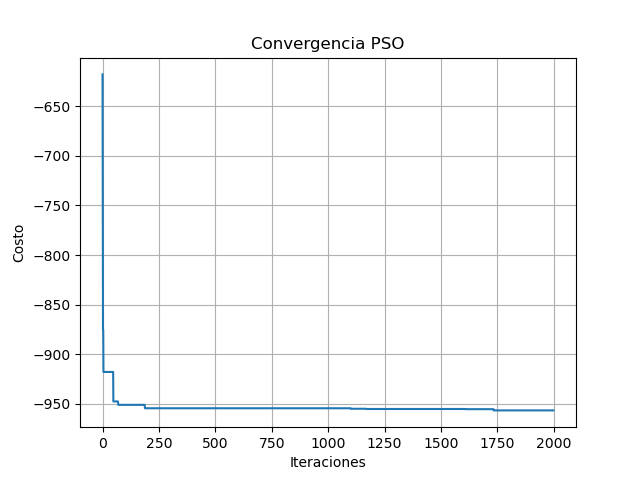

In [13]:
plt.figure()
plt.plot(optimizer.cost_history)
plt.title('Convergencia PSO')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.grid(True)
plt.show()

## Ejecución mediante scipy minimize

In [22]:
x_rand = random.uniform(-512, 512)
y_rand = random.uniform(-512, 512)
x0 = np.array([x_rand, y_rand]) # vector inicial de iteración
bounds = Bounds(xL, xU)
sol = minimize(egg_holder,x0, method='SLSQP', bounds=bounds, options = {'disp':False})
print(f'x0 = {x0[0]}, y0 = {x0[1]}')
print(f'x* = {sol.x[0]}, y* = {sol.x[1]}')
print(f'f(x,y) = {sol.fun}')

x0 = 488.8774298772529, y0 = -144.21596584963993
x* = 511.9999999999998, y* = -206.32950169680768
f(x,y) = -422.21078304601286


##  Solución óptima - gráfica de contorno

In [23]:
def egg_holder_3d(x,y):
    
    x, y = np.meshgrid(x, y)   
    n, m = x.shape
    f = np.zeros([n, m])
    
    for i in range(n):
        for j in range(m):
            f[i,j] = -(y[i,j]+47)*np.sin(np.sqrt(np.abs(y[i,j]+0.5*x[i,j]+47)))-x[i,j]*np.sin(np.sqrt(np.abs(x[i,j]-(y[i,j]+47))))
    
    return x,y,f

In [20]:
n = 50
x = np.linspace(-600,600, n)
y = np.linspace(-600,600, n)

x, y, f = egg_holder_3d(x,y)

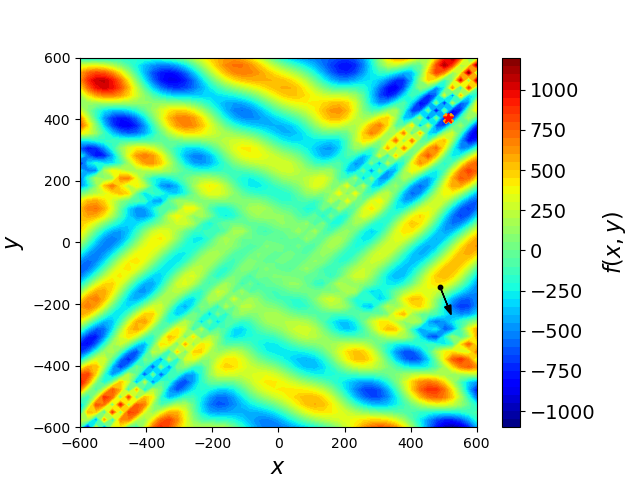

In [24]:
fig, ax = plt.subplots()
contour = ax.contourf(x, y, f, levels=50, cmap='jet')
cbar=fig.colorbar(contour, ax=ax)
cbar.set_label('$f(x,y)$', fontsize = 16)
cbar.ax.tick_params(labelsize = 14)
ax.set_xlabel('$x$', fontsize = 16)
ax.set_ylabel('$y$', fontsize = 16)
ax.scatter(x_rand, y_rand, color = 'black', s = 10) # graficamos el punto inicial de iteración
ax.arrow(x_rand, y_rand, sol.x[0]-x_rand, sol.x[1]-y_rand, head_width = 20, facecolor = 'black') # es una flecha que parte del punto inicial de iteración al óptimo encontrado
ax.scatter(best_pos[0], best_pos[1], color = 'orange', marker = 'X', s = 50) # óptimo de pso
ax.scatter(512, 404.2319, color = 'red', marker = '*', s=50) # punto óptimo

## Gráfico 3D de la fucnión

Text(0.5, 0, ' f(x,y)')

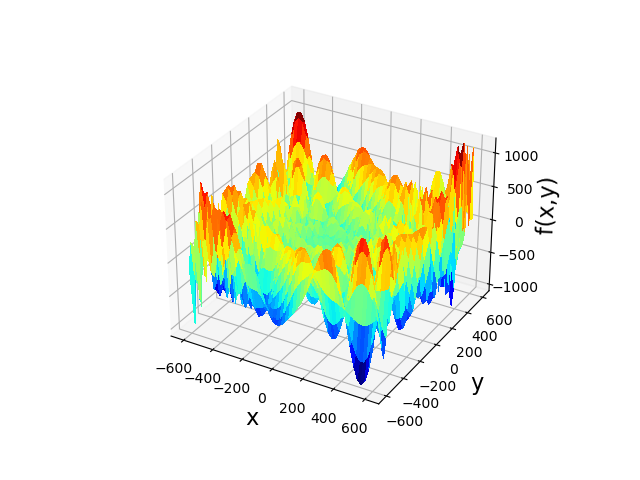

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, f, cmap = cm.jet, linewidth = 0, antialiased = False)
ax.set_xlabel(xlabel = ' x', fontsize = 16)
ax.set_ylabel(ylabel = ' y', fontsize = 16)
ax.set_zlabel(zlabel = ' f(x,y)', fontsize = 16)

## Genetic algorithm (GA) con pymoo

In [26]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.optimize import minimize as min_pymoo

In [27]:
class Egg_Holder_problem(ElementwiseProblem):
    
    def __init__(self):    
        # limites inferiores
        xL = np.array([-512, 512])
        # limites superiores
        xU = np.array([512, 512])        
        super().__init__(n_var = 2, n_obj = 1, n_constr=0, xl = xL, xu = xU)
        
    def _evaluate(self, x, out, *args, **kwargs):       
        # funcion objetivo
        f = -(x[1]+47)*np.sin(np.sqrt(np.abs(x[1]+0.5*x[0]+47)))-x[0]*np.sin(np.sqrt(np.abs(x[0]-(x[1]+47))))
                    
        out["F"] = [f]        

In [28]:
# %% inicializar el algoritmo
problem = Egg_Holder_problem()

crossover = SBX(prob = 0.8, eta=15)

mutation = PolynomialMutation(prob = 0.1, eta=20)

algorithm = GA(pop_size=100, eliminate_duplates=True, crossover = crossover, mutation = mutation)
# ejecutar problema de optimización
res = min_pymoo(problem, algorithm, ("n_gen", 1000), verbose=False, seed = 42)

In [29]:
print(f'x* = {res.X[0]}, y* = {res.X[1]}')
print(f'f(x,y) = {res.F}')

x* = 356.344187513169, y* = 512.0
f(x,y) = [-858.60121515]
